In [1]:
import statsmodels.api as sm
import numpy as np
import pandas as pd
import glob
import matplotlib.pyplot as plt

In [2]:
path_to_data = '/cw3e/mead/projects/cwp140/scratch/dnash/data/'      # project data -- read only
path_to_out  = '../out/'       # output files (numerical results, intermediate datafiles) -- read & write
path_to_figs = '../figs/'      # figures

In [4]:
fname_lst = glob.glob('../out/combined_df_*.csv')
print(fname_lst)
df_lst = []
df_lst2 = [] # whole dataset
for i, fname in enumerate(fname_lst):   
    df = pd.read_csv(fname)
    
    ## clean freezing level - set to nan where freezing level > 10000 m
    df.loc[(df.freezing_level > 10000), 'freezing_level'] = np.nan 
    
    ## clean ASOS_1hr - set to nan where ASOS_1hr > 200 mm per hour
    df.loc[(df.ASOS_1hr > 50), 'ASOS_1hr'] = np.nan
    df.loc[((df.ASOS_prec_accum > 600) | (df.ASOS_prec_accum < 0)), 'ASOS_prec_accum'] = np.nan 
    
    df_lst2.append(df)
    df = df.loc[df['impact_scale'] >= 0]
    
    df_lst.append(df)
    
result = pd.concat(df_lst)
list(df_lst2[0].columns)

['../out/combined_df_HONA2.csv', '../out/combined_df_PAYA.csv', '../out/combined_df_PAPG.csv', '../out/combined_df_PAHN.csv', '../out/combined_df_PAKW.csv', '../out/combined_df_COOPHCSA2.csv', '../out/combined_df_KTNA2.csv', '../out/combined_df_PAGY.csv', '../out/combined_df_PAJN.csv', '../out/combined_df_PAWG.csv', '../out/combined_df_PAGS.csv', '../out/combined_df_PASI.csv', '../out/combined_df_PAKT.csv']


['trackID',
 'Unnamed: 0',
 'trackID.1',
 'start_date',
 'end_date',
 'duration',
 'IVT_max',
 'IVT_max_time',
 'IVT_dir',
 'tIVT',
 'freezing_level',
 'ar_scale',
 'GFS_prec_accum',
 'GFS_prec_max_rate',
 'ASOS_prec_accum',
 'ASOS_1hr',
 'ASOS_3hr',
 'ASOS_6hr',
 'ASOS_12hr',
 'ASOS_24hr',
 'impact_scale',
 'impacts',
 'impact_notes',
 'impact_type',
 'misc']

In [6]:
model_lin = sm.OLS.from_formula("GFS_prec_accum ~ ASOS_prec_accum", data=result)
res = model_lin.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         GFS_prec_accum   R-squared:                       0.231
Model:                            OLS   Adj. R-squared:                  0.228
Method:                 Least Squares   F-statistic:                     86.46
Date:                Thu, 16 Nov 2023   Prob (F-statistic):           3.70e-18
Time:                        12:05:27   Log-Likelihood:                -1758.2
No. Observations:                 290   AIC:                             3520.
Df Residuals:                     288   BIC:                             3528.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          69.2058      7.703      8.985      0.000      54.045      84.366
ASOS_prec_accum     0.4698      0.051      9.298      0.000       0.370       0.569
==============================================================================
Omnibus:                       89.591   Durbin-Watson:                   1.701
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              207.056
Skew:                           1.505   Prob(JB):                     1.09e-45
Kurtosis:                       5.841   Cond. No.                         192.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
for i, df in enumerate(df_lst):
    print(fname_lst[i])
    model_lin = sm.OLS.from_formula("impact_scale ~ IVT_max + duration + freezing_level + IVT_dir + tIVT", data=df)
    res = model_lin.fit()
    res.summary()

../out/combined_df_COOPHOOA2.csv
../out/combined_df_PAYA.csv
../out/combined_df_PAPG.csv
../out/combined_df_PAHN.csv
../out/combined_df_PAKW.csv
../out/combined_df_COOPHCSA2.csv
../out/combined_df_KTNA2.csv
../out/combined_df_PAGY.csv
../out/combined_df_PAJN.csv
../out/combined_df_PAWG.csv
../out/combined_df_PAGS.csv
../out/combined_df_PASI.csv
../out/combined_df_PAKT.csv
../out/combined_df_COOPPECA2.csv


/home/dnash/miniconda3/envs/SEAK-impacts/lib/python3.12/site-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/home/dnash/miniconda3/envs/SEAK-impacts/lib/python3.12/site-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/home/dnash/miniconda3/envs/SEAK-impacts/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/home/dnash/miniconda3/envs/SEAK-impacts/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1870: RuntimeWarning: invalid value encountered in scalar divide
  return self.mse_model/self.mse_resid
/home/dnash/miniconda3/envs/SEAK-impacts/lib/python3.12/site-packages/statsmodels/reg

ValueError: resids must contain at least 2 elements

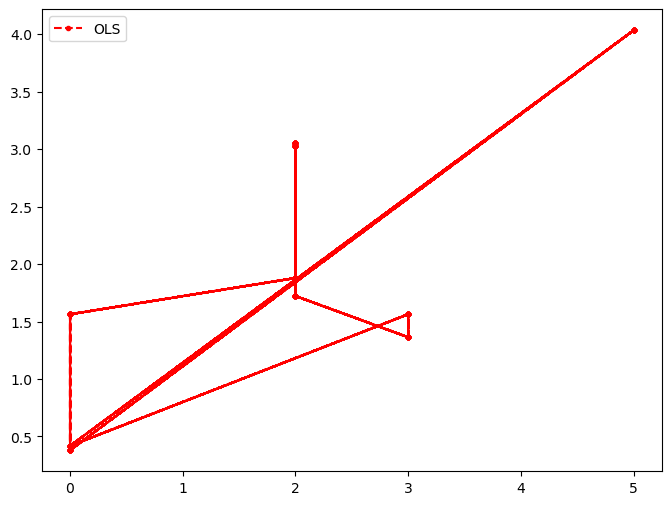

In [49]:
x = result['impact_scale']
pred_ols = res.get_prediction()
iv_l = pred_ols.summary_frame()["obs_ci_lower"]
iv_u = pred_ols.summary_frame()["obs_ci_upper"]

fig, ax = plt.subplots(figsize=(8, 6))

# ax.plot(x, y, "o", label="data")
# ax.plot(x, y_true, "b-", label="True")
ax.plot(x, res.fittedvalues, "r--.", label="OLS")
# ax.plot(x, iv_u, "r--")
# ax.plot(x, iv_l, "r--")
ax.legend(loc="best")


In [52]:
x

442     5.0
945     0.0
1111    3.0
1112    3.0
1159    2.0
       ... 
1160    2.0
1359    2.0
1360    2.0
1429    0.0
1487    0.0
Name: impact_scale, Length: 190, dtype: float64

In [29]:
result_lin.params[1] # IVT coefficient
result_lin.rsquared # r-squared

/tmp/ipykernel_49800/3738277075.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  result_lin.params[1] # IVT coefficient


0.545141258789112